# Gathering

In [1]:
import requests
import os
import pandas as pd
import json
import numpy as np

#### Download The tweet image predictions

In [2]:
#download the file from internet using the url link
# Make directory if it doesn't already exist
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
#if the response is 200, then our request was successful
response

<Response [200]>

In [4]:
#response.content

In [5]:
#save the content with the last name from the url after /
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [6]:
#check for the downloaded file
os.listdir(folder_name)

['image-predictions.tsv']

#### Load the image prediction file

In [7]:
#import the image prediction dataset
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
#display the first 5 rows
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Load the WeRateDogs Twitter archive

In [9]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      count += 1
   #     print(str(count) + ": " + str(tweet_id))
    #    try:
     #       tweet = api.get_status(tweet_id, tweet_mode='extended')
      #      print("Success")
       #     json.dump(tweet._json, outfile)
        #    outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [10]:
#import and display the twitter archive dataset
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Load the tweeter json file

In [11]:
#import tweet json dataset
with open('tweet-json.txt') as file:
    lst = []
    for line in file:
        lst.append(json.loads(line))
tweet_count = pd.DataFrame(lst, columns = ['id', 'retweet_count', 'favorite_count'])

In [12]:
#display the first 5 rows
tweet_count.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data

In [13]:
#view twitter_archive_enhanced data
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
#view the random 5 values
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1909,674422304705744896,NaN,NaN,2015-12-09 02:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She doesn't understand flowers. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674422304...,12,10,Ava,None,None,None,None
690,787397959788929025,NaN,NaN,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chipson. He's aerodynamic af. No ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689283819...,9,10,Chipson,None,None,None,None
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,11,10,Juno,None,None,None,None


In [15]:
#view the infomation of the table
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are a lot of columns with missing values, but most of the columns are irrelevant to our analysis so they will be dropped. <br>
The missing values will be ignored for now

In [16]:
#view the mathematical summary of the numeric data
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
#count the retweeted values
twitter_archive_enhanced.retweeted_status_id.count()

181

181 retweeted datas found

In [18]:
#check for duplicate
twitter_archive_enhanced.duplicated().sum()

0

No duplicate found

In [19]:
#check for value of invalid names with a
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

There are 55 invalid names that have 'a'

In [20]:
#inspect the text column to see if the name 'a' is valid or not. 
#The .style will expand the text column for clearer visibility
twitter_archive_enhanced[twitter_archive_enhanced.name == 'a'].style.set_properties(subset=['text'], **{'width': '300px'})

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872704,nan,nan,2017-07-02 15:32:16 +0000,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af (IG: puffie_the_chow) https://t.co/ghXBIIeQZF,nan,nan,nan,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018112,nan,nan,2016-10-31 02:17:31 +0000,Twitter for iPhone,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,nan,nan,nan,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,nan,nan,2016-09-04 23:46:12 +0000,Twitter for iPhone,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,nan,nan,nan,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,nan,nan,2016-06-28 20:14:22 +0000,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,nan,nan,nan,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,nan,nan,2016-06-28 15:40:07 +0000,Twitter for iPhone,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,nan,nan,nan,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,nan,nan,2016-06-26 01:08:52 +0000,Twitter for iPhone,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,nan,nan,nan,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,nan,nan,2016-06-15 23:24:09 +0000,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,nan,nan,nan,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008256,nan,nan,2016-04-06 02:21:30 +0000,Twitter for iPhone,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,nan,nan,nan,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,nan,nan,2016-04-01 02:51:22 +0000,Twitter for iPhone,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,nan,nan,nan,https://twitter.com/dog_rates/status/715733265223708672/photo/1,10,10,a,None,None,None,None
1340,704859558691414016,nan,nan,2016-03-02 02:43:09 +0000,Twitter for iPhone,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,nan,nan,nan,https://twitter.com/dog_rates/status/704859558691414016/photo/1,10,10,a,None,None,pupper,None


The text column shows the name 'a' is invalid. Change the a to none

In [21]:
#view image_prediction datas
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
#view the infomation of the table
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


No missing value. Other issues will be recorded later

In [23]:
#view the mathematical summary of the numeric data
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Check for duplicates

In [24]:
#check for duplicates
image_prediction.duplicated().sum()

0

No duplicate found

In [25]:
#check if images has duplicates
image_prediction['jpg_url'].duplicated().sum()

66

66 image duplicate found

In [26]:
#view the duplicated images data
image_prediction[image_prediction['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


#### Inspect 2 duplicated values from the image duplicated datas using tweet_id

In [27]:
image_prediction[image_prediction['jpg_url'] == 'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True


In [28]:
image_prediction[image_prediction['jpg_url'] == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


We have thesame informations from the 2 rows. The only difference is the tweet_id which means one is a retweet.
The duplicates needs to be dropped

In [29]:
#view the information of image prediction dataset
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


No missing value found

In [30]:
#to further check for missing values
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

No missing value found

In [31]:
#view tweet count dataset
tweet_count

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [32]:
#view the tweet count dataset information
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [33]:
#check for duplicate values
tweet_count.duplicated().sum()

0

No duplicate found

In [34]:
#check for duplicate id's
tweet_count.id.duplicated().sum()

0

No duplicate found in id

## Visual Assessment
### Quality

#### `twitter_archive_enhanced` table
- name column has a's. [Valid data quality]
- doggo, floofer, pupper, puppo have None instaed of NaN [completeness issue]

#### `image_prediction` table
- p2 & p3 family have low probability and shouldn't be considered
- p1, p1_conf, p1_dog isn't descriptive enough
- p1 has inconsistent text case. Sometimes lower, other time capitalized


### Tidiness
- doggo, floofer, pupper, puppo shouldn't be a separate column
- The retweet_count & favorite_count column of the tweet_count table should be included in the twitter_archive_enhanced table.

## Programatic Assessment
### Quality
`twitter_archive_enhanced` table:
- has retweeted data that shouldn't be there
- timestamp has object type [Valid Issue]
- tweet_id is int instead of object
- in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls are not neccessary for our analysis

`image_prediction` table:
- tweet_id is int instead of object
- 66 duplicates found in jpg_url

`tweet_count` table:
- id isn't consistent with other tables
- id is int instead of object

## Visual & Programatic Assessment
### Quality
`twitter_archive_enhanced` table:
- has 181 retweeted data that shouldn't be there
- timestamp has object type [Valid Issue]
- tweet_id is int instead of object
- in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls are not neccessary for our analysis
- name column has a's. [Valid data quality]
- doggo,floofer, pupper,puppo has none values

`image_prediction` table:
- 66 duplicates found in jpg_url
- tweet_id is int instead of object
- p2 & p3 family have low probability and shouldn't be considered
- p1, p1_conf, p1_dog isn't descriptive enough
- p1 has inconsistent text case. Sometimes lower, other time capitalized

`tweet_count` table:
- id isn't consistent with other tables
- id is int instead of object


### Tidiness
- doggo, floofer, pupper, puppo shouldn't be a separate column
- The retweet_count & favorite_count column of the tweet_count table should be included in the twitter_archive_enhanced table.
- The 3 tables should be together

# Cleaning

##### Make a copy of each dataset

In [35]:
# make a copy of the datasets before cleaning
twitter_archive_clean = twitter_archive_enhanced.copy()
image_prediction_clean = image_prediction.copy()
tweet_count_clean = tweet_count.copy()

#### `twitter_archive_enhanced`:
#### has 181 retweeted data shouldn't be there

### Define
remove the retweeted data from `twitter_archive_clean` table using assigment operator

### Code

In [36]:
#check the shape of the dataset before the cleaning
twitter_archive_clean.shape

(2356, 17)

In [37]:
#assign the value where retweeted_status_id value is NaN
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

### Testing

In [38]:
#check the shape of the dataset after the cleaning
twitter_archive_clean.shape

(2175, 17)

Now we have 2175 rows after cleaning as against 2356

#### `image_prediction_clean` table:
#### 66 duplicates found in jpg_url

### Define
drop the duplicates from `image_prediction_clean` table using drop_duplicate function

### Code

In [39]:
#check the shape of the dataset before the cleaning
image_prediction_clean.shape

(2075, 12)

In [40]:
#drop the jpg_url duplicates
image_prediction_clean.drop_duplicates(subset= 'jpg_url', inplace=True)

### Testing

In [41]:
#check the shape of the dataset after the cleaning
image_prediction_clean.shape

(2009, 12)

Now we have 2009 rows after cleaning as against 2075

### `image_prediction_clean`:
#### - p2 & p3 family have low probability and shouldn't be considered

### Define
Drop these columns from image_prediction_clean using drop function

### Code

In [42]:
#drop p2 and p3 family column
columns_drop = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_prediction_clean.drop(columns_drop, axis=1, inplace=True)

### Testing

In [43]:
#view the columns to confirm if the columns dropped has been removed
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

The columns has been successfully removed

### `twitter_archive_clean`:
#### in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls are not neccessary for our analysis

### Define
Drop these columns from twitter_archive_clean using drop function

### Code

In [44]:
#drop the specified columns that are irrelevant to our analysis
column_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']
twitter_archive_clean.drop(column_list, axis=1, inplace=True)

### Testing

In [45]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


All the columns that was dropped has been removed successfully

### `twitter_archive_clean`
#### name column has a's. [Valid data quality]

### Define
inspect and change the a's in name column

### Coding

In [47]:
#check the number of values for each names before cleaning
twitter_archive_clean.name.value_counts()

None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

In [48]:
twitter_archive_clean[twitter_archive_clean.name == 'a'] = 'None'

### Testing

In [49]:
#check the number of values for each names after cleaning
twitter_archive_clean.name.value_counts()

None          735
Charlie        11
Lucy           11
Oliver         10
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 955, dtype: int64

I changed the a values to none. Now the None value has increased from 680 to 735.

### `image_prediction` table:
#### - p1 has inconsistent text case. Sometimes lower, other time capitalized
#### - p1, p1_conf, p1_dog aren't descriptive enough

### Define
- Capitalize p1 values using labda function
- Rename p1 family as well

### Code

In [50]:
#change the specified columns values to capitalized
image_prediction_clean['p1'] = image_prediction_clean[['p1']].apply(lambda col: col.str.capitalize())

In [51]:
#rename p1 family to be more descriptive
new_names = {'p1': 'breed' , 'p1_conf': 'confidence_level' , 'p1_dog': 'is_dog' }
image_prediction_clean.rename(columns= new_names , inplace =True)

### Testing

In [52]:
#view the first 5 rows to confirm if the names has been capitalized
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,breed,confidence_level,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True


The inconsistent text case has been capitalized, and the columns has been renamed successfully

### Remove the data that isn't dog

### Define
- remove data that isn't dog using is_dog column

### Code

In [53]:
#view the data that isn't dog
image_prediction_clean[image_prediction_clean.is_dog == False]

,tweet_id,jpg_url,img_num,breed,confidence_level,is_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,Desktop_computer,0.086502,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,Three-toed_sloth,0.914671,False
...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,Web_site,0.949591,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,Convertible,0.738995,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,Limousine,0.130432,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False


We have 529 data which isn't dog. We'll drop them

In [54]:
#view the shape before removing the not dog data
image_prediction_clean.shape

(2009, 6)

In [55]:
#reassign the only dog data to image_prediction dataset
image_prediction_clean = image_prediction_clean[image_prediction_clean.is_dog == True]

### Testing

In [56]:
#view the shape after removing the not dag data
image_prediction_clean.shape

(1480, 6)

The new dataset rows is 1480 as against 2009 

### Tidiness

#### `twitter_archive_clean`:
#### doggo, floofer, pupper, puppo shouldn't be under a stages column

### Define
Concatenate doggo, floofer, pupper, puppo into a new column, stages, then drop the doggo and other stages columns

### Define
Concatenate doggo, floofer, pupper, puppo columns to a new column, stages

### Code

In [57]:
#replace none to empty string
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None' , '')

In [58]:
#concatenate 'doggo', 'floofer', 'pupper', 'puppo' columns to one column 'stages'
twitter_archive_clean['stages'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Testing

In [59]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stages
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,


In [60]:
#check for the number of each stages value
twitter_archive_clean.stages.value_counts()

                1835
pupper           220
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: stages, dtype: int64

The concatenation was successful, but we have 2 stages as 1 as a value

#### Inspect the text column to know why we have 2 stages as 1

In [61]:
twitter_archive_clean[twitter_archive_clean.stages == 'doggopupper'].sample(5).style.set_properties(subset=['text'], **{'width': '300px'})

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stages
733,781308096455073792,2016-09-29 01:42:20 +0000,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",12,10,None,doggopupper
705,785639753186217984,2016-10-11 00:34:48 +0000,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,10,10,Pinot,doggopupper
565,802265048156610560,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",11,10,None,doggopupper
956,751583847268179968,2016-07-09 01:08:47 +0000,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,None,doggopupper
889,759793422261743616,2016-07-31 16:50:42 +0000,"Meet Maggie & Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,doggopupper


In [62]:
twitter_archive_clean[twitter_archive_clean.stages == ''].sample(5).style.set_properties(subset=['text'], **{'width': '300px'})

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stages
986,749064354620928000,2016-07-02 02:17:13 +0000,Meet Winston. He's pupset because I forgot to mention that it's Canada Day today. 11/10 please forgive me Winston https://t.co/xEY8dbJxnF,11,10,Winston,
1847,675820929667219456,2015-12-12 23:34:00 +0000,Here's a handful of sleepy puppers. All look unaware of their surroundings. Lousy guard dogs. Still cute tho 11/10s https://t.co/lyXX3v5j4s,11,10,None,
2180,669000397445533696,2015-11-24 03:51:38 +0000,Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/ixcuUYCbdD,11,10,Terrance,
442,819588359383371776,2017-01-12 16:54:26 +0000,This is Jazzy. She just found out that sandwich wasn't for her. Shocked and puppalled. 13/10 deep breaths Jazzy https://t.co/52cItP0vIO,13,10,Jazzy,
432,820749716845686784,2017-01-15 21:49:15 +0000,Meet Sunny. He can take down a polar bear in one fell swoop. Fr*cken deadly af. 13/10 would pet with caution https://t.co/EMq8Ud6Ze1,13,10,Sunny,


This shows that, from the text, we have some with 2 dogs which are in different stages. <br>
I'll drop the rows where we have 2 dog stages

In [63]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.stages != 'doggopuppo']
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.stages != 'doggofloofer']
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.stages != 'doggopupper']

In [64]:
# Replace empty string in stages column to NaN using np.nan function:
twitter_archive_clean['stages'] = twitter_archive_clean['stages'].replace('', np.nan)

#### Testing

In [65]:
twitter_archive_clean[twitter_archive_clean['stages']== '']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stages


In [66]:
twitter_archive_clean.stages.value_counts()

pupper     220
doggo       75
puppo       24
floofer      9
Name: stages, dtype: int64

There's no more empty data in stages, and the double stages has been removed

### `tweet_count`:
#### id isn't consistent with other tables

### Define
rename id column to tweet_id using .rename() function

### Code

In [67]:
tweet_count_clean = tweet_count_clean.rename(columns = {'id': 'tweet_id'})

### Testing

In [68]:
tweet_count_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


The name has been corrected

#### Merge the datasets together to become a table

### Code

In [69]:
#check the shape of twitter_archive_clean before merging
twitter_archive_clean.shape

(2163, 7)

In [70]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,  on=['tweet_id'], how='inner')

In [71]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_count_clean, on=['tweet_id'], how='inner')

### Testing

In [72]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stages,jpg_url,img_num,breed,confidence_level,is_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819


In [73]:
#check the shape of twitter_archive_clean after merging
twitter_archive_clean.shape

(1424, 14)

### `twitter_archive_clean, image_prediction_clean, tweet_count`:
#### tweet_id is int instead of object

### Define
change tweet_id type from int to str

In [74]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)
tweet_count_clean.tweet_id = tweet_count_clean.tweet_id.astype(str)

### Testing

In [75]:
twitter_archive_clean.tweet_id.dtypes, image_prediction_clean.tweet_id.dtypes, tweet_count_clean.tweet_id.dtypes

(dtype('O'), dtype('O'), dtype('O'))

The data types has been changed to 'object'

### `twitter_archive_clean`:
#### timestamp has object type [Valid Issue]

### Define
Change timestamp type to datetime type

### Code

In [76]:
#twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

when I ran the code above, I got this error 'Unknown string format: None' then I passed errors

In [77]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp, dayfirst=True, errors='coerce')

### Testing


In [78]:
twitter_archive_clean.timestamp.dtypes

datetime64[ns, UTC]

In [79]:
twitter_archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stages,jpg_url,img_num,breed,confidence_level,is_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_bay_retriever,0.425595,True,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,2158,12041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,666071193221509120,2015-11-16 01:52:02+00:00,Here we have a northern speckled Rhododendron....,9,10,None,NaN,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,67,154
1420,666063827256086533,2015-11-16 01:22:45+00:00,This is the happiest dog you will ever see. Ve...,10,10,the,NaN,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden_retriever,0.775930,True,232,496
1421,666058600524156928,2015-11-16 01:01:59+00:00,Here is the Rand Paul of retrievers folks! He'...,8,10,the,NaN,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,61,115
1422,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,41,111


##### Inspecting the data again to be sure everything is cleaned before saving

In [80]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 0 to 1423
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1424 non-null   object             
 1   timestamp           1424 non-null   datetime64[ns, UTC]
 2   text                1424 non-null   object             
 3   rating_numerator    1424 non-null   object             
 4   rating_denominator  1424 non-null   object             
 5   name                1424 non-null   object             
 6   stages              214 non-null    object             
 7   jpg_url             1424 non-null   object             
 8   img_num             1424 non-null   int64              
 9   breed               1424 non-null   object             
 10  confidence_level    1424 non-null   float64            
 11  is_dog              1424 non-null   bool               
 12  retweet_count       1424 non-null 

#### `twitter_archive_clean` Table:
#### rating_numerator and denominator should be int instead of object

### Define
Change the rating_numerator and rating_denomenator to int64

### Code

In [81]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('int64')
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype('int64')

### Testing

In [82]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 0 to 1423
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1424 non-null   object             
 1   timestamp           1424 non-null   datetime64[ns, UTC]
 2   text                1424 non-null   object             
 3   rating_numerator    1424 non-null   int64              
 4   rating_denominator  1424 non-null   int64              
 5   name                1424 non-null   object             
 6   stages              214 non-null    object             
 7   jpg_url             1424 non-null   object             
 8   img_num             1424 non-null   int64              
 9   breed               1424 non-null   object             
 10  confidence_level    1424 non-null   float64            
 11  is_dog              1424 non-null   bool               
 12  retweet_count       1424 non-null 

We only have missing value on stages column

#### Check for duplicates

In [83]:
twitter_archive_clean.duplicated().sum()

0

No duplicate found. 

## Storing Data

In [84]:
#Saving my cleaned master dataset
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Generate 3 Insights

In [85]:
df = pd.read_csv('twitter_archive_master.csv')

In [86]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stages,jpg_url,img_num,breed,confidence_level,is_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_bay_retriever,0.425595,True,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,2158,12041


### 3 Insight List
1. Dog with highest like
2. Dog with highest retweet
3. Highest Dog Breed

#### 1. Dog with highest like

In [87]:
df.name.value_counts()

None          357
Charlie        10
Cooper         10
Oliver          9
Lucy            8
             ... 
Davey           1
Fizz            1
Jackson         1
Carbon          1
Christoper      1
Name: name, Length: 758, dtype: int64

In [88]:
df.favorite_count.max()

132810

In [89]:
maximum_likes =df.favorite_count.max()
maximum_likes

132810

In [90]:
df.name[df.favorite_count == maximum_likes ]

246    None
Name: name, dtype: object

The dog with the highest likes has no name. We'll us the tweet_id

In [91]:
df.tweet_id[df.favorite_count == maximum_likes ]

246    822872901745569793
Name: tweet_id, dtype: int64

The tweet_id with highest like is (822872901745569793), with highest number (132810)

#### 2. Dog with highest retweet

In [92]:
maximum_retweet =df.retweet_count.max()
maximum_retweet

79515

In [93]:
df.name[df.retweet_count == maximum_retweet ]

604    None
Name: name, dtype: object

The dog with the highest retweet has no name. We'll us the tweet_id

In [94]:
df.tweet_id[df.retweet_count == maximum_retweet ]

604    744234799360020481
Name: tweet_id, dtype: int64

The tweet_id with highest retweet is (744234799360020481), with highest number (79515)

#### 3. Highest Dog Breed

In [95]:
df.breed.value_counts()

Golden_retriever           134
Labrador_retriever          93
Pembroke                    85
Chihuahua                   77
Pug                         53
                          ... 
Clumber                      1
Scotch_terrier               1
Groenendael                  1
Silky_terrier                1
Black-and-tan_coonhound      1
Name: breed, Length: 111, dtype: int64

Golden_retriever is the highest breed with [134] highest number

## 1 Labelled Visualization

Visualize top 5 breed

In [96]:
df.breed.value_counts().head()

Golden_retriever      134
Labrador_retriever     93
Pembroke               85
Chihuahua              77
Pug                    53
Name: breed, dtype: int64

In [97]:
#function to plot bar chart
def barplot(x):
    return x.plot(kind="barh", figsize=(6,6))

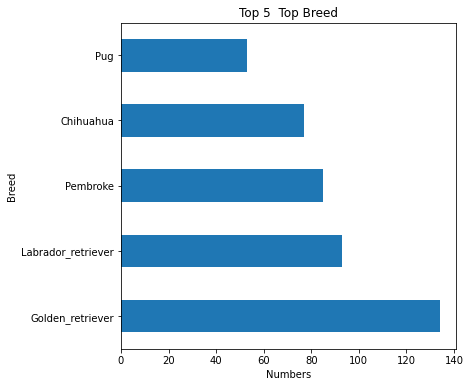

In [98]:
#Visualize the Top 5 Breed
ax = df.breed.value_counts().head()
ax = barplot(ax)
ax.set_title("Top 5  Top Breed")
ax.set_xlabel("Numbers")
ax.set_ylabel("Breed");

#### The plot shows the list of Top 5 Dog Breed. Starting from Golden_retriever(The highest Breed), follow by Labrador_retriever , Pembroke, Chihuahua, & Pug